<a href="https://colab.research.google.com/github/amineHY/Image-classification-of-MNIST/blob/master/pytorch_mnist_simple_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification from  MNIST dataset using a simple Convolutional Neural Network

In [0]:
import torch
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [0]:
torch.manual_seed(777)  # reproducibility

# hyperparameters 
learning_rate = 0.001
training_epochs = 5
batch_size = 100

In [0]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True)

In [10]:
mnist_test.data.size()

torch.Size([10000, 28, 28])

In [14]:
model

NameError: ignored

The architecture we used in this notebook is proposed [ here ](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/index.html)


![Architecture of the CNN](https://drive.google.com/open?id=1URPmwgfCiu7oy9X2PvvHS7lYuG1t3YgQ)
[is here](https://drive.google.com/open?id=1URPmwgfCiu7oy9X2PvvHS7lYuG1t3YgQ)

In [15]:
# CNN Model (2 conv layers)

class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        
        self.layer1 = torch.nn.Sequential(
            # L1 ImgIn shape=(?, 28, 28, 1)
            #    Conv     -> (?, 28, 28, 32)
            #    Pool     -> (?, 14, 14, 32)
            torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = torch.nn.Sequential(
            # L2 ImgIn shape=(?, 14, 14, 32)
            #    Conv      ->(?, 14, 14, 64)
            #    Pool      ->(?, 7, 7, 64)
            torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        # Final FC 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(in_features=7 * 7 * 64, out_features=10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc(out)
        return out


# instantiate CNN model
model = CNN()
model

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=3136, out_features=10, bias=True)
)

In [0]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
# train my model
print('\nLearning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(mnist_train) // batch_size

    for i, (batch_xs, batch_ys) in enumerate(data_loader):
        X = Variable(batch_xs)    # image is already size of (28x28), no reshape
        Y = Variable(batch_ys)    # label is not one-hot encoded

        optimizer.zero_grad()
        prediction = model(X)
        cost = criterion(prediction, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost.data / total_batch

    print("[Epoch: {:<4}] cost = {:_<4.3}".format(epoch + 1, avg_cost.item()))

print('Learning Finished!')


Learning started. It takes sometime.
[Epoch: 1   ] cost = 0.224
[Epoch: 2   ] cost = 0.062
[Epoch: 3   ] cost = 0.0449
[Epoch: 4   ] cost = 0.0356
[Epoch: 5   ] cost = 0.0291
Learning Finished!


In [1]:
# Test model and check accuracy
model.eval()    # set the model to evaluation mode (dropout=False)

X_test = Variable(mnist_test.data.view(len(mnist_test), 1, 28, 28).float())
Y_test = Variable(mnist_test.targets)

# Prediction
prediction = model(X_test)

# Compute accuracy
correct_prediction = (torch.max(prediction.data, dim=1)[1] == Y_test.data)
accuracy = correct_prediction.float().mean().item()
print('\nAccuracy: {:2.2f} %'.format(accuracy*100))


NameError: ignored

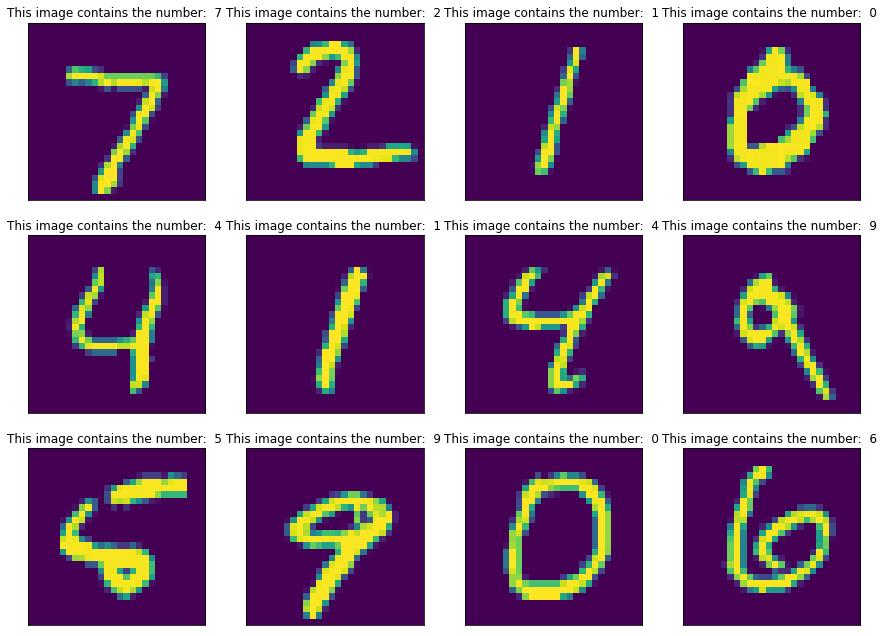

In [8]:
from matplotlib import pylab as plt



plt.figure(figsize=(15,15))
for i in torch.arange(0,12):
  val, idx = torch.max(prediction, dim=1)
  plt.subplot(4,4,i+1)  
  plt.imshow(X_test[i][0])
  plt.title('This image contains the number: {0:>2} '.format(idx[i].item()))
  plt.xticks([]), plt.yticks([])
  plt.plt.subplots_adjust()